# APIs e Flask

Primeiramente **instale as bibliotecas que vamos utilzar na aula**:

```
    pip install requests --user
    pip install Flask --user
```


In [1]:
import requests
from flask import Flask

obs: visualização para ajudar a praticar git

https://git-school.github.io/visualizing-git/

## APIs web

"definição de padões para troca de informação entre softwares"

<img alt="NumPy" src="https://miro.medium.com/max/2000/1*OcmVkcsM5BWRHrg8GC17iw.png" width=1000>

### Exemplos de APIs

- https://dog.ceo/dog-api/
- http://numbersapi.com/
- https://www.last.fm/api/
- http://www.portaltransparencia.gov.br/api-de-dados

As APIs que vimos retornam um JSON e um status.  


### JSON

JSON (JavaScript Object Notation) é basicamente um formato leve de troca de informações/dados entre sistemas.

```    
    {
        "id": 1,
        "nome": "Fulano de Tal", 
        "endereco": "Av. Paulista"
    }
```

### Métodos HTTP

https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Methods

Métodos principais:

    - GET   ("pegar dados")
    - POST  ("enviar dados")

Exemplo de url get com parâmetros:  

```
    http://www.transparencia.gov.br/api-de-dados/cartoes?mesExtratoInicio=01%2F2019&mesExtratoFim=06%2F2019&pagina=1
```

Quando você coloca uma url na barra de navegação, seu navegador está fazendo um get.  
O post é o que ocorre quando você clica num botão `submit` em um formulário , por exemplo.  

### Status HTTP

https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status

## Acessando API com `requests`

Requests é uma biblioteca do python que nos permite acessar APIs:  
https://requests.readthedocs.io/en/master/

In [78]:
import requests

podemos usar para extrair informações de páginas...

In [79]:
r = requests.get('http://www.google.com')
print(r.status_code)

200


In [82]:
#r.text

mas o interesse aqui é acessar as apis:

#### GET

In [14]:
r = requests.get("https://dog.ceo/api/breeds/image/random")
print(f"STATUS: {r.status_code}")
print(r.json())

STATUS: 200
{'message': 'https://images.dog.ceo/breeds/mexicanhairless/n02113978_3864.jpg', 'status': 'success'}


In [15]:
r.json()

{'message': 'https://images.dog.ceo/breeds/mexicanhairless/n02113978_3864.jpg',
 'status': 'success'}

### Exercício

faça uma função que recebe um número `x` e retorne uma lista com três fatos aleatórios sobre este número, obtidos da numbers API.

In [18]:
r = requests.get("http://numbersapi.com/1")

In [20]:
def random_facts(x):
    return [
        requests.get(f'http://numbersapi.com/{x}').text
        for i in range(3)
    ]

In [21]:
random_facts(42)

['42 is the number of museums in Amsterdam (Netherlands has the highest concentration of museums in the world).',
 '42 is the number of kilometers in a marathon.',
 '42 is the number of museums in Amsterdam (Netherlands has the highest concentration of museums in the world).']

#### POST

In [23]:
import requests
import os
import pandas as pd

LASTFM_KEY = os.environ.get("LASTFM_KEY")

In [24]:
r = requests.post(
    "http://ws.audioscrobbler.com/2.0/",
    data={
        "method": "artist.getsimilar",
        "artist": "Pain of Salvation",
        "api_key": LASTFM_KEY,
        "format": "json"
    }
)
r.status_code

200

In [25]:
r.json()

{'similarartists': {'artist': [{'name': 'Haken',
    'mbid': '0246a3fd-a254-416d-8cd2-e31da4ac6f59',
    'match': '1',
    'url': 'https://www.last.fm/music/Haken',
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'mega'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': ''}],
    'streamable': '0'},
   {'name': 'Leprous',
    'mbid': 'a2e55cf5-ca3a-4c26-ba62-fc

In [26]:
df = pd.json_normalize(r.json()['similarartists']['artist'])
df.head()

name                                  mbid     match  \
0      Haken  0246a3fd-a254-416d-8cd2-e31da4ac6f59         1   
1    Leprous  a2e55cf5-ca3a-4c26-ba62-fc4a4f2bc603  0.937332   
2  Riverside  f554c686-ead0-42ef-9deb-3a42f7199196  0.925844   
3     Ayreon  7bbfd77c-1102-4831-9ba8-246fb67460b3  0.890404   
4        OSI  fc19c778-f7c9-40e4-85d1-427236ef8b4d  0.842862   

                                   url  \
0      https://www.last.fm/music/Haken   
1    https://www.last.fm/music/Leprous   
2  https://www.last.fm/music/Riverside   
3     https://www.last.fm/music/Ayreon   
4        https://www.last.fm/music/OSI   

                                               image streamable  
0  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
1  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
2  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
3  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
4  [{'#text': 'https://lastfm.freetls.fastly.net/...          0

In [27]:
r = requests.get(
    "http://ws.audioscrobbler.com/2.0/",
    params={
        "method": "artist.getsimilar",
        "artist": "Pain of Salvation",
        "api_key": LASTFM_KEY,
        "format": "json"
    }
)
r.status_code

200

In [28]:
df = pd.json_normalize(r.json()['similarartists']['artist'])
df.head()

name                                  mbid     match  \
0      Haken  0246a3fd-a254-416d-8cd2-e31da4ac6f59         1   
1    Leprous  a2e55cf5-ca3a-4c26-ba62-fc4a4f2bc603  0.937332   
2  Riverside  f554c686-ead0-42ef-9deb-3a42f7199196  0.925844   
3     Ayreon  7bbfd77c-1102-4831-9ba8-246fb67460b3  0.890404   
4        OSI  fc19c778-f7c9-40e4-85d1-427236ef8b4d  0.842862   

                                   url  \
0      https://www.last.fm/music/Haken   
1    https://www.last.fm/music/Leprous   
2  https://www.last.fm/music/Riverside   
3     https://www.last.fm/music/Ayreon   
4        https://www.last.fm/music/OSI   

                                               image streamable  
0  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
1  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
2  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
3  [{'#text': 'https://lastfm.freetls.fastly.net/...          0  
4  [{'#text': 'https://lastfm.freetls.fastly.net/...          0

### Baixando arquivo com requests

In [29]:
import pandas as pd
import requests

def download():
    csv = requests.get(
        "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
    ).content
    f = open('data.csv', 'wb') # <= salvo no diretorio atual
    f.write(csv)
    f.close()
    df = pd.read_csv('data.csv')
    return df

df = download()
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

## Flask

### O que é flask?

Flask é um micro-framework (um framework minimalista) desenvolvido em Python, para criação de web services.  
https://flask.palletsprojects.com

### O que é um Framework?

http://www.dsc.ufcg.edu.br/~jacques/cursos/map/html/frame/oque.htm


### Exemplo mínimo

Abra o seu browser na url http://localhost:5000  
Para parar a aplicação interrompa o kernel (`Esc + i i`)

In [31]:
__name__

'__main__'

In [32]:
# importar classe 'Flask'
from flask import Flask

# instanciar um objeto da classe flask
app = Flask(__name__)

# cadastrar a função 'hello_world' para ser chamada
# quando a url '/' (raiz) for acessada (Roteamento)
@app.route("/")         
def hello_world():
    # Retorna uma mensagem que irá aparecer no browser
    # o segundo parâmetro é opcional e é o status da requisição
    return "Hello World! <strong>I am learning Flask</strong>", 200

app.run()

In [33]:
#hello_world()

('Hello World! <strong>I am learning Flask</strong>', 200)

#### Obs: já viram decorator?

In [51]:
def envelopar(func):
    def envelopada(a):
        print(f'faz algo antes')
        func(a)
        print(f'faz algo depois')
    return envelopada

def foo(x):
    print(f'esta é foo({x})')

In [52]:
foo(1)

esta é foo(1)


In [42]:
new_foo = envelopar(foo)

In [44]:
new_foo(3)

faz algo antes
esta é foo(3)
faz algo depois


In [45]:
i = 1
j = i + 2

In [46]:
i = 1
i += 2

In [53]:
foo = envelopar(foo)

In [54]:
foo(2)

faz algo antes
esta é foo(2)
faz algo depois


In [70]:
def envelopar(func):
    def envelopada(a):
        print(f'faz algo antes')
        func(a)
        print(f'faz algo depois')
    return envelopada



@envelopar
def foo(x):
    print(f'esta é foo({x})')
    
#foo = envelopar(foo)

In [66]:
foo(2)

faz algo antes
esta é foo(2)
faz algo depois


### Exemplo com URL variável

Acesse por http://localhost:5000/html_page/nome

In [71]:
from flask import Flask

app = Flask("exemplo2")

@app.route("/html_page/<nome>")
def html_page(nome):
    if nome.lower() != 'joao':
        return "Not Found", 404

    return """
    <html>
       <head><title>Aprendendo a usar o Flask</title></head>
       <body>
          <h1>Olá %s! Algumas coisas que você pode fazer em Flask:</h1>
          <ul>
            <li> Escrever html direto na view </li>
            <li> Tentar automatizar a escrita de html via Python</li>
          </ul>
       </body>
    </html>
    """ % nome

app.run()


 * Serving Flask app "exemplo2" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jun/2020 21:15:33] "GET /html_page/nome HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2020 21:15:41] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2020 21:15:57] "GET /html_page/nome HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2020 21:16:02] "GET /html_page/Joao HTTP/1.1" 200 -


### Capturando parâmetros passados pela URL

No browser, entre em http://localhost:5000/noticias/brasil?categoria=ciencia&quantidade=2

In [72]:
# obs: não confundir a biblioteca "requests" com o módulo "request" do flask
from flask import Flask, request

app = Flask("exemplo3")

@app.route("/noticias/<pais>")
def lista_de_noticias(pais):
    cat = request.args.get("categoria")
    qtd = request.args.get("quantidade")
    return "Categoria: {}, Quantidade: {}".format(cat, qtd), 200

app.run()

 * Serving Flask app "exemplo3" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jun/2020 21:18:57] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:19:07] "GET /noticias/brasil?categoria=ciencia&quantidade=4 HTTP/1.1" 200 -


### Exercício

Modifique o código acima para retornar um json.  
Em seguida, acesse a sua "api" usando requests (usando outro jupyter notebook).


In [74]:
__name__

'__main__'

In [83]:
from flask import Flask, request

app = Flask(__name__)

@app.route("/noticias/<pais>")
def lista_de_noticias(pais):
    cat = request.args.get("categoria")
    qtd = request.args.get("quantidade")
    return {
        'categoria': cat,
        'quantidade': qtd
    }, 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jun/2020 21:40:36] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:43:13] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:43:19] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:43:51] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:44:27] "GET /noticias/brasil?categoria=ciencia&quantidade=2 HTTP/1.1" 200 -


### Outros casos de uso

#### especificando o tipo de método

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# tente fazer um get e um post neste endpoint e veja a diferença
# quais códigos de status são retornados e qual o seu significado
@app.route("/show_config", methods=['GET']))
def show_config():
    querystring_args = request.args.to_dict()
    if int(querystring_args['id']) == 10:
        return jsonify(
            id = 10,
            nome = "Joao",
        )
    return "Não há usuário com esse id."

app.run()

#### recebendo um json via post

In [85]:
from flask import Flask, request

app = Flask(__name__)

@app.route("/show_config", methods=['POST'])
def show_config():
    post_args = request.json # <= assumindo que irá receber por json
    if post_args['id'] == 10:
        return "Usuário salvo com sucesso!", 200
    return "Usuário não pôde ser salvo.", 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-06-17 21:51:59,640] ERROR in app: Exception on /show_config [POST]
Traceback (most recent call last):
  File "/home/joao/.local/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/joao/.local/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/joao/.local/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/joao/.local/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/joao/.local/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/joao/.local/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)


#### recebendo arquivo

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


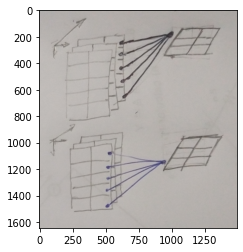

127.0.0.1 - - [17/Jun/2020 21:55:57] "POST /show_config HTTP/1.1" 200 -


In [86]:
from flask import Flask, request, jsonify
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

app = Flask(__name__)

@app.route("/show_config", methods=['POST'])
def show_config():
    if not 'file' in request.files:
        return "Erro! Não há arquivo na requisição.", 400
    image = Image.open(request.files['file'])
    arr = np.array(image)
    plt.imshow(arr)
    plt.show()
    return "Imagem visualizada corretamente!", 200
   
app.run()

#### enviando arquivo local

In [87]:
!ls

aux.ipynb  data.csv  flask.ipynb


In [88]:
from flask import Flask, send_from_directory

app = Flask(__name__)

@app.route('/show_config', methods=['GET'])
def download():
    return send_from_directory(directory="", filename="data.csv")

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Jun/2020 21:58:06] "GET /show_config HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:58:47] "GET /show_config HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2020 21:59:13] "GET /show_config HTTP/1.1" 200 -
